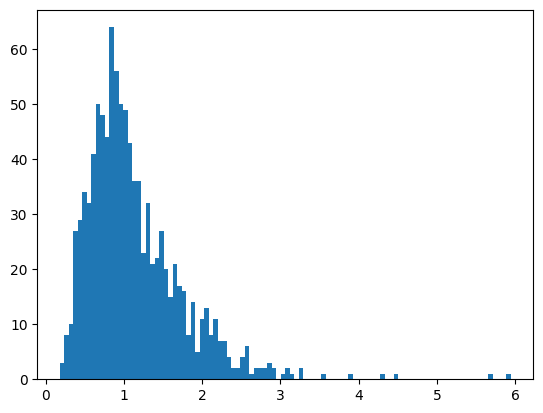

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


# Generate a random sample of 100 points from a normal distribution
#sample = np.random.normal(size=1000)
# Generate a weibull distribution
#sample = np.random.weibull(2, 1000)
# Generate a lognormal distribution
#sample = np.random.lognormal(0, 0.5, 1000)
#generate a uniform distribution
#sample = np.random.uniform(0, 1, 1000)
# Plot the sample as histogram with 20 bins
plt.hist(sample, bins=100)
plt.show()


In [ ]:
# 

In [ ]:
# ENTER CODE HERE TO FIND THE BEST FITTING DISTRIBUTION

In [3]:
#write sample to file sample.csv for use in other programs
#import fs

#with fs.open_fs('file://') as fs:
#    with fs.open('sample.csv', 'w') as f:
#       for i in range(len(sample)):
#            f.write(str(sample[i]) + '\n')






In [ ]:
# test which distribution is closer to the sample: normal lognormal or uniform or weibull
def test_distribution(sample, distribution):
    # Fit the sample to the distribution
    params = distribution.fit(sample)
    # plot the sample and the fitted distribution to see how good the fit is
    plt.hist(sample, bins=100, density=True)
    # plot the fitted distribution for the sample with the fitted parameters
    plt.plot(np.linspace(min(sample), max(sample), 100), distribution.pdf(np.linspace(min(sample), max(sample), 100), *params))
    
    
    # Apply Kolmogorov-Smirnov test
    p = stats.kstest(sample, distribution.name, args=params)
    return p

# Test the sample against normal, lognormal, uniform and weibull distributions
# loop over the distributions [stats.norm, stats.lognorm, stats.uniform, stats.weibull_min]
distributions = [stats.norm, stats.lognorm, stats.uniform, stats.weibull_min]
# loop over the distributions and test each one
pvalues = []
for distribution in distributions:
    # test the sample against the distribution
    p = test_distribution(sample, distribution)
    # print the p-value of the test
    pvalues.append(p[1])
    
print(pvalues)

#choose the distribution with the highest p-value as the best fit
best_distribution = distributions[np.argmin(pvalues)]
print("best: "+str(best_distribution.name))